In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
sns.set_style('darkgrid')

In [135]:
df = pd.read_csv(r'data.csv', encoding= 'unicode_escape', dtype={'InvoiceNo':str, 'CustomerID':str})
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


#### Having only records where no return of product

In [138]:
df = df[df.Quantity>0]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


#### Removing null records from dataframe

In [139]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133361
Country             0
dtype: int64

In [140]:
df = df.dropna().reset_index(drop = True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
397919,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
397920,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
397921,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


#### Calculating a new field as Sales 

In [141]:
df['sales'] = df['Quantity']*df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
397919,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France,10.20
397920,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France,12.60
397921,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France,16.60
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France,16.60


#### Getting the dates from InvoiceDate field and converting in DD/MM/YYYY format

In [142]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate.str.split(expand = True)[0], format='%m/%d/%Y')
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime('%d-%m-%Y')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
397919,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011,0.85,12680,France,10.20
397920,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011,2.10,12680,France,12.60
397921,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011,4.15,12680,France,16.60
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011,4.15,12680,France,16.60


#### Creating CustomerID and frequency dataframe by counting InvoiceNo against Customer. (We have dropped duplicate Invoices against Cust as one Invoice no considered as single transaction)

In [148]:
df_freq = df.drop_duplicates(subset=['CustomerID','InvoiceNo']).groupby('CustomerID', as_index=False)['InvoiceNo'].count().rename(
      columns = {'InvoiceNo':'Frequency'})
df_freq

,CustomerID,Frequency
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1
...,...,...
4334,18280,1
4335,18281,1
4336,18282,2
4337,18283,16


#### creating dataframe with Total sales based on Customer

In [157]:
df_final = df.groupby('CustomerID', as_index=False)[[ 'InvoiceDate', 'sales']].agg({
                                    'InvoiceDate':'max', 'sales': 'sum'    }).rename(
      columns = {'InvoiceDate':'Last_date','sales':'Monetory'})
df_final

,CustomerID,Last_date,Monetory
0,12346,18-01-2011,"77,183.60"
1,12347,31-10-2011,"4,310.00"
2,12348,25-09-2011,"1,797.24"
3,12349,21-11-2011,"1,757.55"
4,12350,02-02-2011,334.40
...,...,...,...
4334,18280,07-03-2011,180.60
4335,18281,12-06-2011,80.82
4336,18282,05-08-2011,178.05
4337,18283,30-11-2011,"2,094.88"


#### Adding Frequency in df_final dataframe

In [158]:
df_final['Frequency'] = df_freq['Frequency']
df_final

,CustomerID,Last_date,Monetory,Frequency
0,12346,18-01-2011,"77,183.60",1
1,12347,31-10-2011,"4,310.00",7
2,12348,25-09-2011,"1,797.24",4
3,12349,21-11-2011,"1,757.55",1
4,12350,02-02-2011,334.40,1
...,...,...,...,...
4334,18280,07-03-2011,180.60,1
4335,18281,12-06-2011,80.82,1
4336,18282,05-08-2011,178.05,2
4337,18283,30-11-2011,"2,094.88",16


In [159]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4339 non-null   object 
 1   Last_date   4339 non-null   object 
 2   Monetory    4339 non-null   float64
 3   Frequency   4339 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 135.7+ KB


In [160]:
## changing 'Last_date' to date format
df_final[['Last_date']] = df_final[['Last_date']].apply(pd.to_datetime, format = '%d-%m-%Y')
df_final

,CustomerID,Last_date,Monetory,Frequency
0,12346,2011-01-18,"77,183.60",1
1,12347,2011-10-31,"4,310.00",7
2,12348,2011-09-25,"1,797.24",4
3,12349,2011-11-21,"1,757.55",1
4,12350,2011-02-02,334.40,1
...,...,...,...,...
4334,18280,2011-03-07,180.60,1
4335,18281,2011-06-12,80.82,1
4336,18282,2011-08-05,178.05,2
4337,18283,2011-11-30,"2,094.88",16


In [161]:
df_final['Recency'] = (max(df_final['Last_date']) - df_final['Last_date']).dt.days
df_final

,CustomerID,Last_date,Monetory,Frequency,Recency
0,12346,2011-01-18,"77,183.60",1,325
1,12347,2011-10-31,"4,310.00",7,39
2,12348,2011-09-25,"1,797.24",4,75
3,12349,2011-11-21,"1,757.55",1,18
4,12350,2011-02-02,334.40,1,310
...,...,...,...,...,...
4334,18280,2011-03-07,180.60,1,277
4335,18281,2011-06-12,80.82,1,180
4336,18282,2011-08-05,178.05,2,126
4337,18283,2011-11-30,"2,094.88",16,9


#### Segmenting at decile level for Customers based on Monetory

In [162]:
df_final['seg'] =  pd.qcut(df_final.Monetory, q=10, labels=False)
df_final

,CustomerID,Last_date,Monetory,Frequency,Recency,seg
0,12346,2011-01-18,"77,183.60",1,325,9
1,12347,2011-10-31,"4,310.00",7,39,9
2,12348,2011-09-25,"1,797.24",4,75,7
3,12349,2011-11-21,"1,757.55",1,18,7
4,12350,2011-02-02,334.40,1,310,2
...,...,...,...,...,...,...
4334,18280,2011-03-07,180.60,1,277,1
4335,18281,2011-06-12,80.82,1,180,0
4336,18282,2011-08-05,178.05,2,126,1
4337,18283,2011-11-30,"2,094.88",16,9,8


In [163]:
df_final.groupby('seg')[['Frequency','Recency','Monetory']].mean()

,Frequency,Recency,Monetory
seg,,,
0,1.13,169.78,105.86
1,1.28,151.72,200.80
2,1.46,160.01,304.42
3,1.72,141.60,414.42
4,2.26,140.04,582.72
5,2.87,137.38,793.98
6,3.65,134.71,"1,133.58"
7,4.83,130.65,"1,679.22"
8,6.91,136.21,"2,719.02"


In [164]:
df_final.groupby('seg')[['Monetory']].sum()/np.sum(df_final.groupby('seg')[['Monetory']].sum())

,Monetory
seg,
0,0.01
1,0.01
2,0.01
3,0.02
4,0.03
5,0.04
6,0.06
7,0.08
8,0.13


* **From above result we can see that Top 10% Customer based on Sales/Revenue, contributing 61% of total Revenue**

#### Calculating 3 quantiles for 'recency', 'Frequency' and 'Monetory' variable and adding in the Dataframe

In [165]:
df_final[['Recency','Frequency','Monetory']].quantile(q =  [0.33,0.66])

,Recency,Frequency,Monetory
0.33,65.00,1.00,384.97
0.66,196.00,4.00,"1,159.56"


#### We will term customer having Recency less than p33, 'Active' and greater than p66 as 'Churn' and rest as 'At Risk'

In [167]:
df_final['seg_r'] =  np.where(df_final.Recency <=65, 'Active', np.where(df_final.Recency <=196, 'At Risk','Churn'))
df_final['seg_f'] =  np.where(df_final.Frequency<=23,1,np.where(df_final.Frequency<=72,2,3))
df_final['seg_m'] =  np.where(df_final.Monetory<=369.26,1,np.where(df_final.Monetory<=1119.76,2,3))
df_final

,CustomerID,Last_date,Monetory,Frequency,Recency,seg,seg_r,seg_f,seg_m
0,12346,2011-01-18,"77,183.60",1,325,9,Churn,1,3
1,12347,2011-10-31,"4,310.00",7,39,9,Active,1,3
2,12348,2011-09-25,"1,797.24",4,75,7,At Risk,1,3
3,12349,2011-11-21,"1,757.55",1,18,7,Active,1,3
4,12350,2011-02-02,334.40,1,310,2,Churn,1,1
...,...,...,...,...,...,...,...,...,...
4334,18280,2011-03-07,180.60,1,277,1,Churn,1,1
4335,18281,2011-06-12,80.82,1,180,0,At Risk,1,1
4336,18282,2011-08-05,178.05,2,126,1,At Risk,1,1
4337,18283,2011-11-30,"2,094.88",16,9,8,Active,1,3


#### We will use 3X3 matrix for Active, At Risk and Churn Customers and classify them in Platinum, Silver, Gold and Standard category as shown in below image

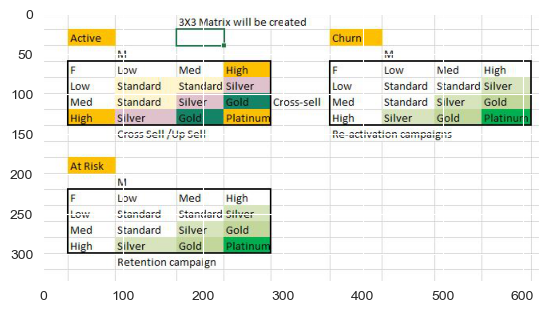

In [174]:
image = plt.imread('Capture.jpg')
plt.imshow(image);

In [168]:
df_final['seg_fm'] = np.where(((df_final.seg_f==3) & (df_final.seg_m ==3)), 'Platinum', np.where( (((df_final.seg_f==2) & (df_final.seg_m ==3)) | ((df_final.seg_f==3) & (df_final.seg_m ==2))) ,'Gold', 
                    np.where( (((df_final.seg_f==1) & (df_final.seg_m ==3)) | ((df_final.seg_f==2) & (df_final.seg_m ==2)) | ((df_final.seg_f==3) & (df_final.seg_m ==1))),
                            'Silver','Standard')))
df_final

,CustomerID,Last_date,Monetory,Frequency,Recency,seg,seg_r,seg_f,seg_m,seg_fm
0,12346,2011-01-18,"77,183.60",1,325,9,Churn,1,3,Silver
1,12347,2011-10-31,"4,310.00",7,39,9,Active,1,3,Silver
2,12348,2011-09-25,"1,797.24",4,75,7,At Risk,1,3,Silver
3,12349,2011-11-21,"1,757.55",1,18,7,Active,1,3,Silver
4,12350,2011-02-02,334.40,1,310,2,Churn,1,1,Standard
...,...,...,...,...,...,...,...,...,...,...
4334,18280,2011-03-07,180.60,1,277,1,Churn,1,1,Standard
4335,18281,2011-06-12,80.82,1,180,0,At Risk,1,1,Standard
4336,18282,2011-08-05,178.05,2,126,1,At Risk,1,1,Standard
4337,18283,2011-11-30,"2,094.88",16,9,8,Active,1,3,Silver


In [169]:
df_final[['Recency', 'Frequency', 'Monetory','seg_r','seg_fm']].groupby(['seg_r','seg_fm'], as_index=False).mean()

,seg_r,seg_fm,Recency,Frequency,Monetory
0,Active,Gold,21.16,34.58,"38,032.78"
1,Active,Platinum,27.40,119.00,"53,786.22"
2,Active,Silver,27.65,6.81,"3,375.63"
3,Active,Standard,32.29,1.86,448.61
4,At Risk,Gold,135.34,33.21,"21,969.32"
5,At Risk,Platinum,115.50,153.50,"46,272.78"
6,At Risk,Silver,119.76,6.98,"3,416.28"
7,At Risk,Standard,121.89,2.06,483.57
8,Churn,Gold,279.28,36.67,"25,984.13"
9,Churn,Platinum,254.00,74.00,"280,206.02"


In [170]:
df_final['seg_rfm'] = df_final['seg_r'] + '_' + df_final['seg_fm']
df_final

,CustomerID,Last_date,Monetory,Frequency,Recency,seg,seg_r,seg_f,seg_m,seg_fm,seg_rfm
0,12346,2011-01-18,"77,183.60",1,325,9,Churn,1,3,Silver,Churn_Silver
1,12347,2011-10-31,"4,310.00",7,39,9,Active,1,3,Silver,Active_Silver
2,12348,2011-09-25,"1,797.24",4,75,7,At Risk,1,3,Silver,At Risk_Silver
3,12349,2011-11-21,"1,757.55",1,18,7,Active,1,3,Silver,Active_Silver
4,12350,2011-02-02,334.40,1,310,2,Churn,1,1,Standard,Churn_Standard
...,...,...,...,...,...,...,...,...,...,...,...
4334,18280,2011-03-07,180.60,1,277,1,Churn,1,1,Standard,Churn_Standard
4335,18281,2011-06-12,80.82,1,180,0,At Risk,1,1,Standard,At Risk_Standard
4336,18282,2011-08-05,178.05,2,126,1,At Risk,1,1,Standard,At Risk_Standard
4337,18283,2011-11-30,"2,094.88",16,9,8,Active,1,3,Silver,Active_Silver
